# Base de dados: Candidatos a vagas na mineradora de ouro

## Pergunta iniciais a serem exploradas
- Existe influência do gênero na contratação? 
- Existe influência da expectativa salarial com a contratação? 
- Uma pessoa com formação mais alta possui nota maior na prova? 
- Existe influência da idade na contratação? 
- Pessoas mais velhas tendem a ter uma formação mais completa? 
- Existe influência do curso do diploma na nota? E na contratação? 
- A disponibilidade é um fator importante para a contratação? 
- Pessoas mais velhas possuem mais experiência? 
- Pessoas com mais experiência possuem preferência na contratação?

## Importando bibliotecas

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Importando base de dados

In [32]:
df = pd.read_csv("dados_candidatos.csv")
df

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


## Limpando os dados

### Renomeando as colunas

In [33]:
df = df.rename(columns={'date': 'data',
                       'cheveux': 'cabelo', 
                        'age': 'idade',
                        'exp': 'experiencia',
                        'salaire': 'salario',
                        'sexe': 'sexo',
                        'diplome': 'diploma',
                        'specialite': 'especialidade',
                        'note': 'nota',
                        'dispo': 'disponibilidade',
                        'embauche': 'contratado',
                        'Unnamed: 0':'id'
                       })
                   
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


### Renomeando os dados categóricos

In [34]:
df['sexo'].replace({"F": "Feminino",
                       "M":"Masculino",
                       "": "Não informado"}
                      , inplace = True)

df['diploma'].replace({"licence": "Licenciatura",
                           "bac":"Bacharelado",
                           "master": "Mestrado",
                           "doctorat": "Doutorado",
                           "": "Sem Formação"}
                      , inplace = True)

df["cabelo"].replace({"roux": "Ruivo",
                      "chatain": "Loiro Escuro",
                      "blond": "Loiro",
                      "brun": "Castanho",
                      "": "Não Informado"}
                     , inplace = True)

df["especialidade"].replace({"archeologie": "Arqueologia",
                             "detective": "Detetive",
                             "forage": "Perfuração",
                             "geologie": "Geologia",
                             "": "Sem Especialização"}
                            , inplace = True)

df["disponibilidade"].replace({"non": "Não",
                               "oui": "Sim"}
                              , inplace = True)

df["contratado"].replace({0: "Não",
                               1: "Sim"}
                              , inplace = True)

# Resultado
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,Ruivo,25.0,9.0,26803.0,Feminino,Licenciatura,Geologia,97.08,Não,Não
1,1,2011-04-21,Loiro,35.0,13.0,38166.0,Masculino,Licenciatura,Perfuração,63.86,Não,Não
2,2,2012-09-07,Loiro,29.0,13.0,35207.0,Masculino,Licenciatura,Geologia,78.50,Não,Não
3,3,2011-07-01,Castanho,NaN,12.0,32442.0,Masculino,Licenciatura,Geologia,45.09,Não,Não
4,4,2012-08-07,Ruivo,35.0,6.0,28533.0,Feminino,Licenciatura,Detetive,81.91,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47.0,9.0,35723.0,Masculino,Licenciatura,Geologia,66.47,Não,Não
19996,19996,2010-09-19,Loiro Escuro,38.0,10.0,33570.0,Feminino,Mestrado,Geologia,62.29,Não,Sim
19997,19997,2010-09-02,Loiro Escuro,23.0,6.0,33751.0,Feminino,Doutorado,Detetive,103.48,Sim,Não
19998,19998,2011-12-06,Loiro Escuro,33.0,11.0,34167.0,Feminino,Licenciatura,Detetive,73.35,Não,Não


### Removendo dados inválidos
Algumas variáveis da base de dados estão incoerentes, como idade negativa. Esses dados serão removidos.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
id                 20000 non-null int64
data               19909 non-null object
cabelo             19897 non-null object
idade              19909 non-null float64
experiencia        19904 non-null float64
salario            19905 non-null float64
sexo               19900 non-null object
diploma            19890 non-null object
especialidade      19907 non-null object
nota               19886 non-null float64
disponibilidade    19894 non-null object
contratado         20000 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [36]:
# Removendo os valores nulos (NA, NaN...)
df = df[df['data'].notna()]
df = df[df['cabelo'].notna()]
df = df[df['idade'].notna()]
df = df[df['experiencia'].notna()]
df = df[df['salario'].notna()]
df = df[df['sexo'].notna()]
df = df[df['diploma'].notna()]
df = df[df['especialidade'].notna()]
df = df[df['nota'].notna()]
df = df[df['disponibilidade'].notna()]
df = df[df['contratado'].notna()]

# Idade não pode ser negativa
# Além disso, vamos considerar que pessoas com menos de 12 anos não estão trabalhando (idade mínima para trabalhar na França)
df = df[df['idade'] >= 12]

# Experiencia não pode ser menor que 0
df = df[df['experiencia'] >= 0]

# Nota não pode ser menor que 0
df = df[df['nota'] >= 0]

# Resultado
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,Ruivo,25.0,9.0,26803.0,Feminino,Licenciatura,Geologia,97.08,Não,Não
1,1,2011-04-21,Loiro,35.0,13.0,38166.0,Masculino,Licenciatura,Perfuração,63.86,Não,Não
2,2,2012-09-07,Loiro,29.0,13.0,35207.0,Masculino,Licenciatura,Geologia,78.50,Não,Não
4,4,2012-08-07,Ruivo,35.0,6.0,28533.0,Feminino,Licenciatura,Detetive,81.91,Não,Não
5,5,2014-02-12,Loiro Escuro,37.0,8.0,38558.0,Masculino,Mestrado,Geologia,63.46,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47.0,9.0,35723.0,Masculino,Licenciatura,Geologia,66.47,Não,Não
19996,19996,2010-09-19,Loiro Escuro,38.0,10.0,33570.0,Feminino,Mestrado,Geologia,62.29,Não,Sim
19997,19997,2010-09-02,Loiro Escuro,23.0,6.0,33751.0,Feminino,Doutorado,Detetive,103.48,Sim,Não
19998,19998,2011-12-06,Loiro Escuro,33.0,11.0,34167.0,Feminino,Licenciatura,Detetive,73.35,Não,Não


### Convertendo tipos de dados

In [37]:
# Convertendo 'idade' e 'experiência' de float para int
df['idade'] = df['idade'].astype('int')
df['experiencia'] = df['experiencia'].astype('int')

# Convertendo o tipo de variável da data
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Resultado
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,Ruivo,25,9,26803.0,Feminino,Licenciatura,Geologia,97.08,Não,Não
1,1,2011-04-21,Loiro,35,13,38166.0,Masculino,Licenciatura,Perfuração,63.86,Não,Não
2,2,2012-09-07,Loiro,29,13,35207.0,Masculino,Licenciatura,Geologia,78.50,Não,Não
4,4,2012-08-07,Ruivo,35,6,28533.0,Feminino,Licenciatura,Detetive,81.91,Não,Não
5,5,2014-02-12,Loiro Escuro,37,8,38558.0,Masculino,Mestrado,Geologia,63.46,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47,9,35723.0,Masculino,Licenciatura,Geologia,66.47,Não,Não
19996,19996,2010-09-19,Loiro Escuro,38,10,33570.0,Feminino,Mestrado,Geologia,62.29,Não,Sim
19997,19997,2010-09-02,Loiro Escuro,23,6,33751.0,Feminino,Doutorado,Detetive,103.48,Sim,Não
19998,19998,2011-12-06,Loiro Escuro,33,11,34167.0,Feminino,Licenciatura,Detetive,73.35,Não,Não


## Análise Exploratória dos Dados

### Uma pessoa com formação mais alta possui nota maior na prova?

A fim de analisarmos a relação entre o nível da formação de uma pessoa e a sua nota na prova, vamos construir um gráfico de boxplot. Para melhorar a sua interpretação, os boxplots foram ordenados de maneira crescente à sua mediana.

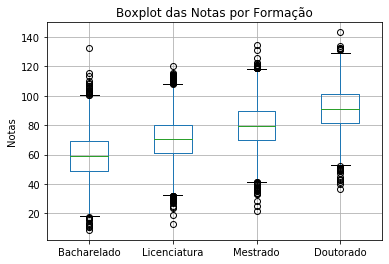

In [38]:
# Criando uma função para ordenar e plotar o boxplot
def boxplot_ordenado(df, by, column):
  df_h1_ordenado = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df_h1_ordenado.median().sort_values()
  df_h1_ordenado[meds.index].boxplot()
  plt.title("Boxplot das Notas por Formação")
  plt.ylabel("Notas")

# Copiando o dataframe para não alterar o original
df_h1 = df[:]

# Aplicando a função
boxplot_ordenado(df_h1, by="diploma", column="nota")

Percebe-se, portanto, que a mediana das notas dos candidatos com um nível de formação maior tende a ser mais alta do que aqueles com um nível de formação menor.

### Pessoas mais velhas possuem mais experiência?
Para analisar essa questão, vamos plotar um gráfico de dispersão entre as variáveis Experiência e Idade.

Text(0, 0.5, 'Experiência (em anos)')

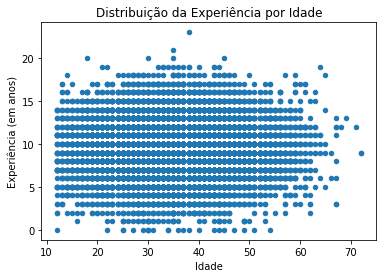

In [39]:
# Copiando o dataframe para não alterar o original
df_h2 = df[:]

# Plotando o gráfico de dispersão, ajustando seu título e os nomes dos eixos
scatter_plot=df_h2.plot.scatter(x='idade',y='experiencia')
scatter_plot.plot()
plt.title("Distribuição da Experiência por Idade")
plt.xlabel("Idade")
plt.ylabel("Experiência (em anos)")

Observando o gráfico, percebe-se que não existe uma relação entre a idade e os anos de experiência de uma pessoa. Portanto, pessoas mais velhas não necessariamente possuem mais experiência que as outras.

### Existe influência da expectativa salarial com a contratação?

Nessa questão, foi construído um histograma de barras empilhadas, comparando a densidade de frequência dos contratados e dos não contratados distribuídas pela expectativa salarial.

Text(0, 0.5, 'Densidade de Frequência')

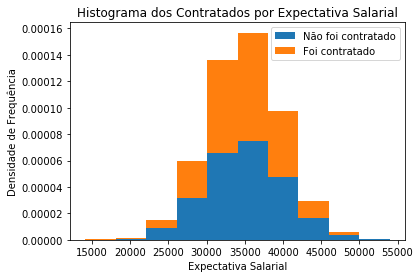

In [40]:
# Copiando o dataframe para não alterar o original
df_h31 = df[:]

# Pivotando o dataframe e plotando o gráfico
df_h31[["salario", "contratado"]].pivot(columns="contratado").plot(kind="hist", stacked=True, density=True)
plt.legend(['Não foi contratado', 'Foi contratado'])
plt.title("Histograma dos Contratados por Expectativa Salarial")
plt.xlabel("Expectativa Salarial")
plt.ylabel("Densidade de Frequência")

Percebe-se, portanto, que a densidade para os contratados e não contratados é bem semelhante em todos os intervalos. Logo, provavelmente não existe uma influência da expectativa salarial na contratação.

## Existe influência da idade na contratação?

Com a intenção de entender se existe alguma relação entre a idade e a possibilidade de contratação, fizemos este gráfico de Violino.

Text(0, 0.5, 'Idade')

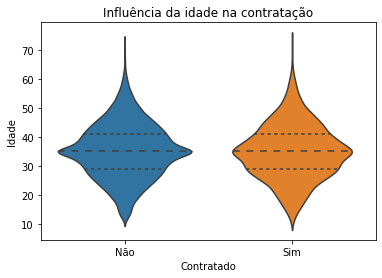

In [41]:
# Copiando o dataframe para não alterar o original
df_idade = df[:]

# Plotando o violinplot
idade_contratacao = sns.violinplot(x="contratado", y="idade", data=df_idade, inner="quartile")
plt.title("Influência da idade na contratação")
plt.xlabel("Contratado")
plt.ylabel("Idade")

Torna-se visível que a idade do indivíduo não influencia no momento da contratação. A distribuição é idêntica para os contratados e os não contratados, assim como os quartis são semelhantes.

## Existe influência do gênero na contratação? 


Para responder tal pergunta, foram feitos dois gráficos de barras.

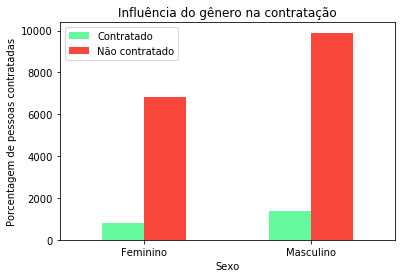

In [42]:
# Copiando o dataframe para não alterar o original
df_genero = df[:]

# Selecionando as colunas desejadas
df_genero = df_genero[['contratado' , 'sexo']]

# Separando o dataframe em dois
contratado_genero = df_genero[df_genero['contratado'] == "Sim"]
nao_contratado_genero = df_genero[df_genero['contratado'] == "Não"]

# Contando as ocorrências
contratado_genero = contratado_genero.groupby('sexo').count()
nao_contratado_genero = nao_contratado_genero.groupby('sexo').count()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
nao_contratado_genero = pd.Series(nao_contratado_genero['contratado'], name = ("nao_contratado"))

# Concatenando para retornar ao dataframe desejado
contratado_genero = pd.concat([contratado_genero, nao_contratado_genero], axis=1)

# Criando uma paleta de cores (foi utilizado o adobe color para conseguir cores complementares)
cores_contratacao = ['#64FA9D', '#FA473D']

# Plotando o gráfico de barras duplas
contratado_genero.plot(kind='bar', rot=0, color = cores_contratacao)
plt.title("Influência do gênero na contratação")
plt.xlabel("Sexo")
plt.ylabel("Porcentagem de pessoas contratadas")
plt.legend(['Contratado', 'Não contratado'])

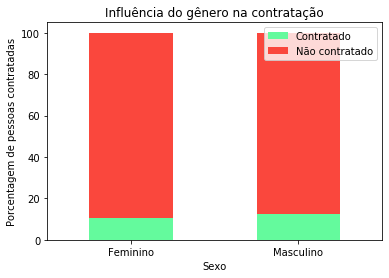

In [43]:
# Plotando o gráfico de barras emppilhadas
stacked_data = contratado_genero.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, rot=0, color = cores_contratacao)
plt.title("Influência do gênero na contratação")
plt.xlabel("Sexo")
plt.ylabel("Porcentagem de pessoas contratadas")
plt.legend(['Contratado', 'Não contratado'])

Depois de analisarmos os dois gráficos, fica nítido que o gênero da pessoa não possui influência na contratação da mesma.

## Existe influência da especialização com as notas?

Para checar se há relação entre a especialização e as notas, foram feitos dois gráficos de barras: um deles com as notas médias por especialização e o outro semelhante, mas com barras duplas divididas por candidatos contratados e não contratados

In [44]:
df_media = df[:]
df_media[['especialidade', 'nota']].groupby(['especialidade']).mean()

,nota
especialidade,
Arqueologia,81.309573
Detetive,78.648512
Geologia,72.529291
Perfuração,75.982631


Text(0, 0.5, 'Média Nota')

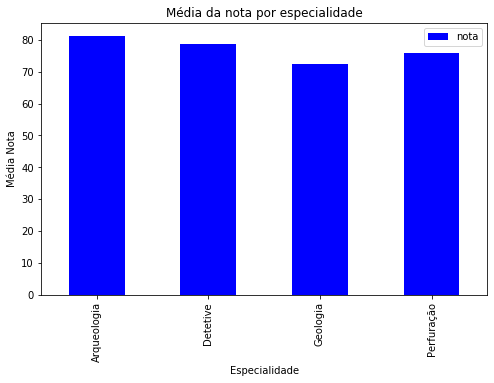

In [45]:
cor = ['blue']

df_media[['especialidade', 'nota']].groupby(['especialidade']).mean().plot(figsize = (8,5), kind = 'bar', color = cor)
plt.title('Média da nota por especialidade')
plt.xlabel('Especialidade')
plt.ylabel('Média Nota')

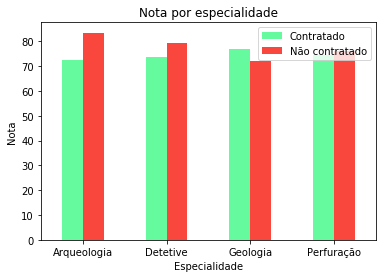

In [46]:
# Copiando o dataframe para não alterar o original
df_especialidade = df[:]

# Selecionando as colunas desejadas
df_especialidade = df_especialidade[['contratado' , 'nota', 'especialidade']]

# Separando o dataframe em dois
especialidade_contratado = df_especialidade[df_especialidade['contratado'] == "Sim"]
especialidade_nao_contratado = df_especialidade[df_especialidade['contratado'] == "Não"]

# Contando as ocorrências
especialidade_contratado = especialidade_contratado.groupby('especialidade').mean()
especialidade_nao_contratado = especialidade_nao_contratado.groupby('especialidade').mean()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
especialidade_contratado = pd.Series(especialidade_contratado['nota'], name = ("nota_contratado"))
nao_contratado_genero = pd.Series(especialidade_nao_contratado['nota'], name = ("nota_nao_contratado"))

# Concatenando para retornar ao dataframe desejado
df_especialidade = pd.concat([especialidade_contratado, especialidade_nao_contratado], axis=1)

#Resultado
df_especialidade

# Plotando o gráfico de barras duplas
df_especialidade.plot(kind='bar', rot=0, color = cores_contratacao)
plt.title("Nota por especialidade")
plt.xlabel("Especialidade")
plt.ylabel("Nota")
plt.legend(['Contratado', 'Não contratado'])

Depois de analisar os gráficos, percebe-se que a especialidade interfere minimamente na nota.

## Pessoas com mais experiência possuem preferência na contratação?

Com a finalidade de compreendermos se existe alguma relação entre pessoas com mais experiências e uma maior contratação, fizemos este histograma.

Text(0, 0.5, 'Densidade de Frequência')

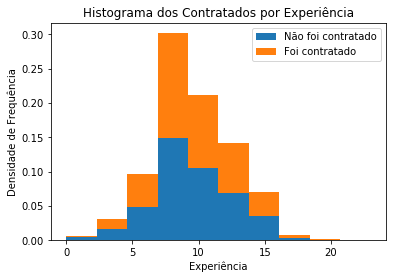

In [47]:
# Copiando o dataframe para não alterar o original
df_h_exp_cont = df[:]

# Pivotando o dataframe e plotando o gráfico
df_h_exp_cont[["experiencia", "contratado"]].pivot(columns="contratado").plot(kind="hist", stacked=True, density=True)
plt.legend(['Não foi contratado', 'Foi contratado'])
plt.title("Histograma dos Contratados por Experiência")
plt.xlabel("Experiência")
plt.ylabel("Densidade de Frequência")

Apenas com o gráfico acima, a relação ainda não fica muito perceptível, pois é difícil de comparar as proporções. Faremos abaixo mais um gráfico de barras múltiplas e outro de barras empilhadas.

Text(0.5, 0.98, 'Influência da experiência na contratação')

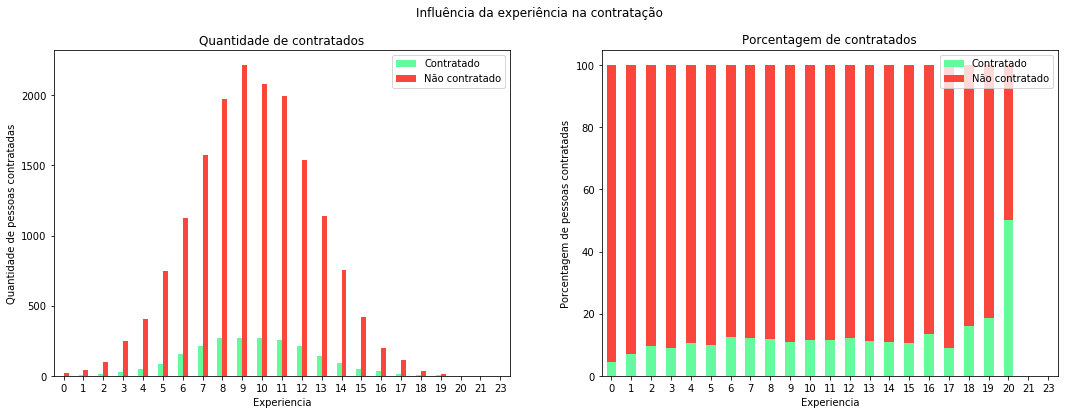

In [49]:
# Copiando o dataframe para não alterar o original
df_experiencia = df[:]

# Selecionando as colunas desejadas
df_experiencia = df_experiencia[['contratado' , 'experiencia']]

# Separando o dataframe em dois
contratado_experiencia = df_experiencia[df_experiencia['contratado'] == "Sim"]
nao_contratado_experiencia = df_experiencia[df_experiencia['contratado'] == "Não"]

# Contando as ocorrências
contratado_experiencia = contratado_experiencia.groupby('experiencia').count()
nao_contratado_experiencia = nao_contratado_experiencia.groupby('experiencia').count()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
nao_contratado_experiencia = pd.Series(nao_contratado_experiencia['contratado'], name = ("nao_contratado"))

# Concatenando para retornar ao dataframe desejado
contratado_experiencia = pd.concat([contratado_experiencia, nao_contratado_experiencia], axis=1)

# Criando uma paleta de cores (foi utilizado o adobe color para conseguir cores complementares)
cores_contratacao = ['#64FA9D', '#FA473D']

# Tranformando dados para obter o gráfico de barras empilhadas com as proporções
dados_empilhados = contratado_experiencia.apply(lambda x: x*100/sum(x), axis=1)

# Plotando os gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,6))
contratado_experiencia.plot(kind='bar', rot=0, color = cores_contratacao,ax=axes[0])
axes[0].set_title("Quantidade de contratados")
axes[0].set_xlabel("Experiencia")
axes[0].set_ylabel("Quantidade de pessoas contratadas")
axes[0].legend(['Contratado', 'Não contratado'])
dados_empilhados.plot(kind="bar", stacked=True, rot=0, color = cores_contratacao,ax=axes[1])
axes[1].set_title("Porcentagem de contratados")
axes[1].set_xlabel("Experiencia")
axes[1].set_ylabel("Porcentagem de pessoas contratadas")
axes[1].legend(['Contratado', 'Não contratado'])
fig.suptitle("Influência da experiência na contratação")

Percebe-se, que a porcentagem de candidatos contratados por anos de experiência aumenta ligeiramente conforme a experiência aumenta, apesar de que a experiência dos candidatos se concentre numa faixa de 6 a 13 anos, aproximadamente, diminuindo nas "extremidades". Logo, observando os gráficos, pode existir uma leve influência da experiência do candidato na contratação dessa mineradora.

### A disponibilidade é um fator importante para a contratação? 
Podemos ver no gráfico abaixo, de barras empilhadas, que a disponibilidade não é um fator que parece influenciar na contratação

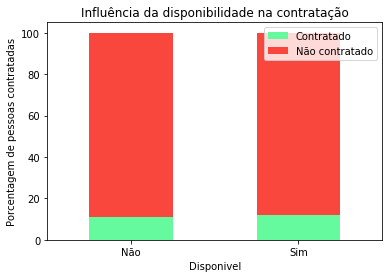

In [20]:
# Copiando o dataframe para não alterar o original
df_disponibilidade = df[:]

# Selecionando as colunas desejadas
df_disponibilidade = df_disponibilidade[['contratado' , 'disponibilidade']]

# Separando o dataframe em dois
contratado_disponibilidade = df_disponibilidade[df_disponibilidade['contratado'] == "Sim"]
nao_contratado_disponibilidade = df_disponibilidade[df_disponibilidade['contratado'] == "Não"]

# Contando as ocorrências
contratado_disponibilidade = contratado_disponibilidade.groupby('disponibilidade').count()
nao_contratado_disponibilidade = nao_contratado_disponibilidade.groupby('disponibilidade').count()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
nao_contratado_disponibilidade = pd.Series(nao_contratado_disponibilidade['contratado'], name = ("nao_contratado"))

# Concatenando para retornar ao dataframe desejado
df_disponibilidade = pd.concat([contratado_disponibilidade, nao_contratado_disponibilidade], axis=1)

# Plotando o gráfico de barras empilhadas
barras_empilhadas = df_disponibilidade.apply(lambda x: x*100/sum(x), axis=1)
barras_empilhadas.plot(kind="bar", stacked=True, rot=0, color = cores_contratacao)
plt.title("Influência da disponibilidade na contratação")
plt.xlabel("Disponivel")
plt.ylabel("Porcentagem de pessoas contratadas")
plt.legend(['Contratado', 'Não contratado'])

### Influência da nota na contratação
Após tantas análises com relação a contratação, decidimos analisar mais uma variável nesse sentido: a nota. A expectativa era de que ela fosse um fator mais decisivo para a contratação, mas como podemos ver a seguir, as notas altas não estão tão relacionadas à contratação como era esperado.

[Text(0, 0, '9.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '39.0'),
 Text(0, 0, '54.0'),
 Text(0, 0, '69.0'),
 Text(0, 0, '84.0'),
 Text(0, 0, '99.0'),
 Text(0, 0, '114.0'),
 Text(0, 0, '129.0')]

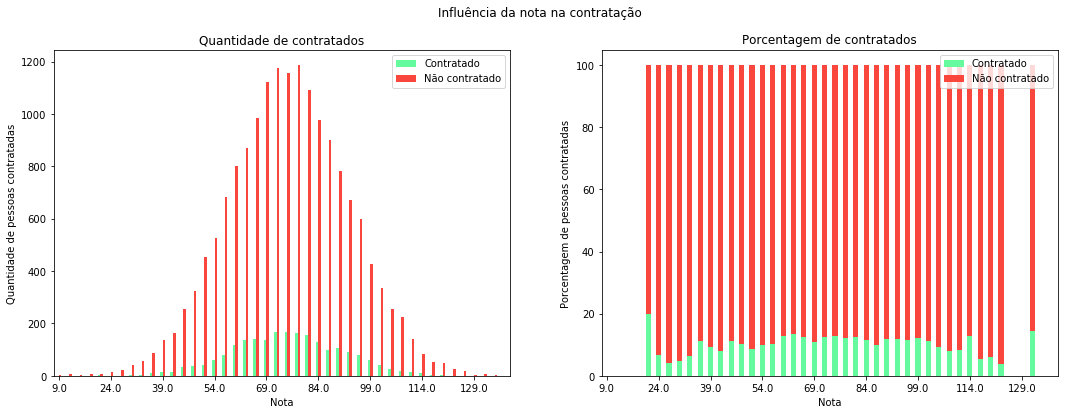

In [115]:
# Copiando o dataframe para não alterar o original
df_nota = df[:]

# Selecionando as colunas desejadas
df_nota = df_nota[['contratado' , 'nota']]

# Tranformando a nota em faixas
df_nota['nota'] = round(df_nota['nota']/3)*3

# Separando o dataframe em dois
contratado_nota = df_nota[df_nota['contratado'] == "Sim"]
nao_contratado_nota = df_nota[df_nota['contratado'] == "Não"]

# Contando as ocorrências
contratado_nota = contratado_nota.groupby('nota').count()
nao_contratado_nota = nao_contratado_nota.groupby('nota').count()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
nao_contratado_nota = pd.Series(nao_contratado_nota['contratado'], name = ("nao_contratado"))

# Concatenando para retornar ao dataframe desejado
contratado_nota = pd.concat([contratado_nota, nao_contratado_nota], axis=1)

# Tranformando dados para obter o gráfico de barras empilhadas com as proporções
dados_empilhados = contratado_experiencia.apply(lambda x: x*100/sum(x), axis=1)

# Plotando os gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (18,6))
contratado_nota.plot(kind='bar', color = cores_contratacao,ax=axes[0], rot=0)
axes[0].set_title("Quantidade de contratados")
axes[0].set_xlabel("Nota")
axes[0].set_ylabel("Quantidade de pessoas contratadas")
axes[0].legend(['Contratado', 'Não contratado'])
dados_empilhados.plot(kind="bar", stacked=True, color = cores_contratacao,ax=axes[1], rot=0)
axes[1].set_title("Porcentagem de contratados")
axes[1].set_xlabel("Nota")
axes[1].set_ylabel("Porcentagem de pessoas contratadas")
axes[1].legend(['Contratado', 'Não contratado'])
fig.suptitle("Influência da nota na contratação")

# Corrigindo as labels do gráfico a direita
n = 5
ticks = axes[1].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in axes[1].xaxis.get_ticklabels()]
axes[1].xaxis.set_ticks(ticks[::n])
axes[1].xaxis.set_ticklabels(ticklabels[::n])

# Corrigindo as labels do gráfico a esqueda
ticks = axes[0].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in axes[0].xaxis.get_ticklabels()]
axes[0].xaxis.set_ticks(ticks[::n])
axes[0].xaxis.set_ticklabels(ticklabels[::n])

## Analisando a variável data
Já tendo respondido às perguntas anteriores, planejadas inicialmente, pudemos ver que basicamente não havíamos explorado a variável temporal que temos na base de dados. Por isso, nesse tópico, vamos utilizar esse dado nas nossas análises.

### Contratações acumuladas ao longo do tempo
Podemos ver abaixo, que ao longo do tempo, o acúmulo de funcionários contratados parece aumentar de uma forma praticamente constante. Isso pode significar uma constante rotatividade de funcionários, ou uma expansão, já que não temos os dados sobre as demissões.

Text(0, 0.5, 'Acumulado de pessoas contratadas')

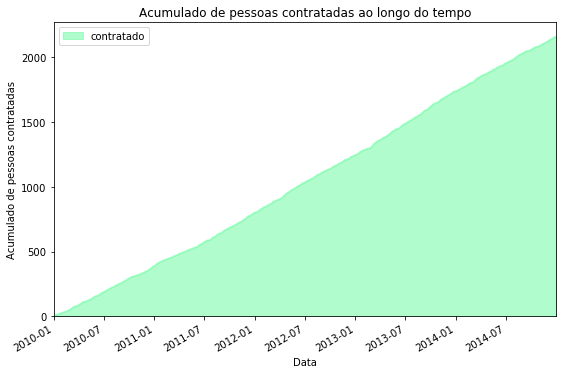

In [21]:
# Copiando o dataframe para não alterar o original
df_tempo = df[:]

# Filtrando para apenas candidatos contratados
df_tempo = df_tempo[df_tempo['contratado'] == "Sim"]

# Agrupando por data e contando os funcionários
df_tempo = df_tempo.groupby('data').count()

# Ordenando o dataframe pela data
df_tempo.sort_values('data', inplace = True)

# Fazendo uma soma acumulada da quantidade de funcionários contratados
df_tempo['contratado'] = df_tempo['contratado'].cumsum()

# Plotando o gráfico
df_tempo.plot.area(y='contratado',stacked=False, color ='#64FA9D', figsize = (9,6))
plt.title("Acumulado de pessoas contratadas ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Acumulado de pessoas contratadas")

### Expectativa salarial ao longo do tempo
É de se esperar que a expectativa salarial dos funcionários aumente, pois ela é dada em números absolutos. Porém, analisando o gráfico abaixo, podemos ver que houve variações na expectativa salarial média, mas não há indícios de ter acontecido uma tendência de crescimento nesse número, apesar da inflação no país no período analisado.
Mesmo assim, é possível ver que a média da expectativa salarial ao longo do tempo tem uma relação de ordem de acordo com o diploma, nesse sentido os candidatos com bacharelado têm uma média de expectativa salarial mais alta, enquanto os candidatos com doutorado têm uma média de expectativa salarial mais baixa.

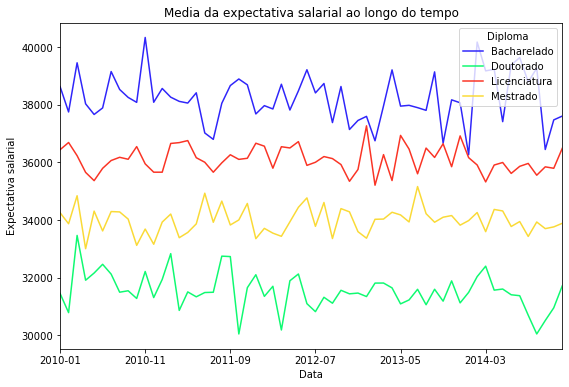

In [22]:
# Copiando o dataframe para não alterar o original
df_tempo = df[:]

# Convertendo o formato da data
df_tempo['data'] = df_tempo['data'].dt.strftime('%Y-%m')

# Agrupando por data e diploma e calculando a média da expectativa salarial. Resetando o index para obter a coluna novamente
df_tempo = df_tempo.groupby(['data','diploma']).mean().reset_index()

# Paleta de cores para os diplomas
cores_diplomas = ['#2F25FA',"#0FFA71","#FA3425","#FADA37"]

# Selecionando as colunas desejadas, pivotando e plotando o gráfico de linhas
df_tempo[['data','diploma','salario']].pivot(columns='diploma', 
                                             index='data').plot.line(y='salario', 
                                                                     figsize=(9,6), 
                                                                     color = cores_diplomas)

# Ajustando o gráfico
plt.title("Media da expectativa salarial ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Expectativa salarial")
plt.legend(title = 'Diploma',loc="upper right")

Agora, filtrando o gráfico acima para analisarmos essa relação apenas dos funcionários que foram contratados, vemos que a expectativa salarial entre os diplomas perde a relação anterior, além de variar consideravelmente mais no geral.

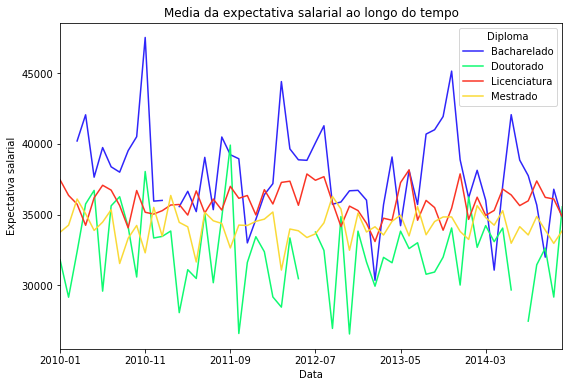

In [23]:
# Copiando o dataframe para não alterar o original
df_tempo = df[:]

# Convertendo o formato da data
df_tempo['data'] = df_tempo['data'].dt.strftime('%Y-%m')

# Filtrando para apenas candidatos contratados
df_tempo = df_tempo[df_tempo['contratado'] == "Sim"]

# Agrupando por data e diploma e calculando a média da expectativa salarial. Resetando o index para obter a coluna novamente
df_tempo = df_tempo.groupby(['data','diploma']).mean().reset_index()

# Selecionando as colunas desejadas, pivotando e plotando o gráfico de linhas
df_tempo[['data','diploma','salario']].pivot(columns='diploma', 
                                             index='data').plot.line(y='salario', 
                                                                     figsize=(9,6), color = 
                                                                     cores_diplomas)

# Ajustando o gráfico
plt.title("Media da expectativa salarial ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Expectativa salarial")
plt.legend(title = 'Diploma',loc = "upper right")

## Conclusões
Utilizando os dados à nossa disposição na base de dados utilizada, fizemos uma análise exploratória dos dados orientada pelas perguntas iniciais que foram elaboradas, levando em consideração as variáveis da base de dados, o contexto e a natureza dos dados. A partir disso, geramos diversos gráficos, majoritariamente em análises bidimensionais.

É possível ver que o gráfico mais utilizado nas análises foi o gráfico de barras empilhadas, pois com eles conseguimos comparar melhor grande parte dos dados, já que a maioria das perguntas estavam relacionadas à contratação dos candidatos, sendo que eles são divididos em contratados e não contratados.

Apesar de respondermos todas as perguntas feitas inicialmente, os resultados que obtivemos não nos indicaram uma variável nessa base de dados que tenha grande influência na contratação (pelo menos não de forma isolada, das maneiras que pudemos analisar). Até mesmo a nota dos candidatos, que à primeira vista soa ser um fator determinante, não teve indicativos de ter forte influência na contratação, pois foram contratados funcionários com notas relativamente baixas, e numa proporção que não se alterou muito conforme a variação das notas. Em suma, a variável mostrou ter mais influência na contratação foi a experiência prévia dos candidatos, mas mesmo ela não apresentou uma forte correlação, além de que a amostra de candidatos com pouco tempo de experiência (4 anos ou menos) e com muitos anos de experiência (15 anos ou mais) é muito pequena com relação ao restante.

Com isso, nós nos estendemos um pouco além das perguntas para analisar os dados temporais, pois ainda não havíamos utilizado eles. O resultado nesse caso foi mais interessante, pois ao ver a expectativa salarial dos candidatos ao longo do tempo, era esperado que acontecesse um aumento da expectativa salarial (principalmente por uma inflação natural que os países sofrem), mas outra relação foi observada: a expectativa salarial média do tempo dividida pela formação dos candidatos nos mostrou que no geral a média da expectativa salarial dos candidatos é maior para aqueles com bacharelado e menor para os que possuíam doutorado. Porém, quando a base é filtrada para ser apresentada essa média apenas dos candidatos que foram contratados, essa relação não é mantida. Isto é, embora a expectativa salarial dos funcionários não aparenta influenciar na contratação anteriormente, pudemos ver que o perfil dos candidatos contratados é diferente do geral. Isso tudo pode indicar que exista um outro conjunto de fatores que esteja relacionado à escolha de funcionários que a empresa faz.

## Bibliografia
PANDAS - **Comparison with R / R libraries**. Disponível em: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html?highlight=comparison. Acessado em 17 de junho de 2021.

SEABORN - **seaborn.violinplot**. Disponível em: https://seaborn.pydata.org/generated/seaborn.violinplot.html. Acessado em 17 de junho de 2021.

STACKOVERFLOW - **How can I plot separate Pandas DataFrames as subplots?**. Disponível em: https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots. Acessado em 17 de junho de 2021.

PANDAS - **pandas.DataFrame.plot.line**. Disponível em: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html. Acessado em 17 de junho de 2021.

DELFTSTACK - **Pandas Remover Linhas com NaN**. Disponível em: https://www.delftstack.com/pt/howto/python-pandas/pandas-drop-rows-with-nan/. Acessado em 17 de junho de 2021.

SHANE - **Bar Plots in Python using Pandas DataFrames**. Disponível em: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/. Acessado em 17 de junho de 2021.

STACKOVERFLOW - **Pandas: bar plot xtick frequency**.https://stackoverflow.com/questions/19143857/pandas-bar-plot-xtick-frequency. . Acessado em 19 de junho de 2021.